In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import io

In [2]:
df_cr = pd.read_csv('data/Clean_Mortgage_Lending_IL_Chicago.csv')

In [3]:
df_cr.head()

,ethnicity,race,gender,action_taken,preapproval_requested,loan_type,loan_purpose,interest_only_payment,balloon_payment,debt_to_income_ratio,age,income,loan_to_value_ratio
0,Not Hispanic or Latino,White,Female,1,No Preapproval Requested,Converntional,Refinancing,No Interest-only Payments,No Balloon Payment,30%-<36%,Middle-Aged,Upper-Middle Class,< Conventional Bar
1,Not Hispanic or Latino,White,Male,0,No Preapproval Requested,Converntional,Home Improvement,No Interest-only Payments,No Balloon Payment,36%-<50%,Older,Lower-Middle Class,< Conventional Bar
2,Not Hispanic or Latino,White,Male,1,No Preapproval Requested,Converntional,Home Purchase,No Interest-only Payments,No Balloon Payment,30%-<36%,Middle-Aged,Rich,< Conventional Bar
3,Not Hispanic or Latino,White,Female,1,No Preapproval Requested,Converntional,Refinancing,No Interest-only Payments,No Balloon Payment,20%-<30%,Middle-Aged,Upper-Middle Class,< Conventional Bar
4,Hispanic or Latino,White,Male,1,No Preapproval Requested,Converntional,Refinancing,No Interest-only Payments,No Balloon Payment,36%-<50%,Middle-Aged,Middle Class,< Conventional Bar


In [4]:
df_cr.tail()

,ethnicity,race,gender,action_taken,preapproval_requested,loan_type,loan_purpose,interest_only_payment,balloon_payment,debt_to_income_ratio,age,income,loan_to_value_ratio
110877,Not Hispanic or Latino,White,Male,1,No Preapproval Requested,VA-guaranteed,Refinancing,No Interest-only Payments,No Balloon Payment,30%-<36%,Older,Lower-Middle Class,> Conventional Bar and < FHA Bar
110878,Not Hispanic or Latino,White,Male,0,No Preapproval Requested,Converntional,Refinancing,No Interest-only Payments,No Balloon Payment,36%-<50%,Middle-Aged,Upper-Middle Class,< Conventional Bar
110879,Not Hispanic or Latino,Asian,Male,1,No Preapproval Requested,Converntional,Refinancing,No Interest-only Payments,No Balloon Payment,36%-<50%,Older,Upper-Middle Class,< Conventional Bar
110880,Not Hispanic or Latino,White,Female,1,No Preapproval Requested,Converntional,Refinancing,No Interest-only Payments,No Balloon Payment,36%-<50%,Middle-Aged,Rich,< Conventional Bar
110881,Not Hispanic or Latino,White,Male,1,No Preapproval Requested,Converntional,Refinancing,No Interest-only Payments,No Balloon Payment,30%-<36%,Middle-Aged,Upper-Middle Class,> Conventional Bar and < FHA Bar


# Categorical Features Data Cleaning

### ethnicity 

In [5]:
pd.unique(df_cr['ethnicity'])

array(['Not Hispanic or Latino', 'Hispanic or Latino'], dtype=object)

In [6]:
df_cr['ethnicity'].mask((df_cr['ethnicity'] == "Hispanic or Latino"), 1, inplace=True)
df_cr['ethnicity'].mask((df_cr['ethnicity'] == "Not Hispanic or Latino"), 0, inplace=True)

In [7]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

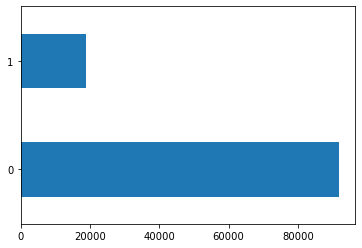

In [8]:
# explore is_not_hispanic category
df_cr["ethnicity"].value_counts().plot(kind='barh')

### race

In [9]:
pd.unique(df_cr['race'])

array(['White', 'Asian', 'Black or African American', 'Minority Races'],
      dtype=object)

In [10]:
df_cr['race'].mask((df_cr['race'] == "White"), 1, inplace=True)
df_cr['race'].mask((df_cr['race'] == "Asian"), 2, inplace=True)
df_cr['race'].mask((df_cr['race'] == "Black or African American"), 3, inplace=True)
df_cr['race'].mask((df_cr['race'] == "Minority Races"), 4, inplace=True)

In [11]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

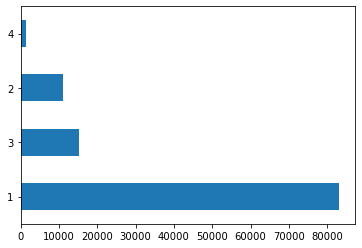

In [12]:
# explore derived_race category
df_cr["race"].value_counts().plot(kind='barh')

### gender


In [13]:
pd.unique(df_cr['gender'])

array(['Female', 'Male'], dtype=object)

In [14]:
df_cr['gender'].mask((df_cr['gender'] == "Male"), 1, inplace=True)
df_cr['gender'].mask((df_cr['gender'] == "Female"), 0, inplace=True)

<AxesSubplot:>

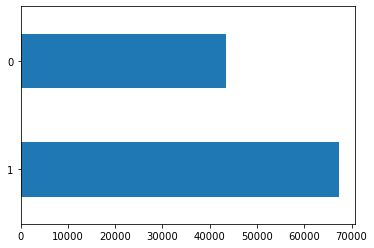

In [15]:
# explore is_male category
df_cr["gender"].value_counts().plot(kind='barh')

### age

In [16]:
pd.unique(df_cr['age'])

array(['Middle-Aged', 'Older', 'Young'], dtype=object)

In [17]:
df_cr['age'].mask((df_cr['age'] == "Young"), 1, inplace=True)
df_cr['age'].mask((df_cr['age'] == "Middle-Aged"), 2, inplace=True)
df_cr['age'].mask((df_cr['age'] == "Older"),3, inplace=True)

<AxesSubplot:>

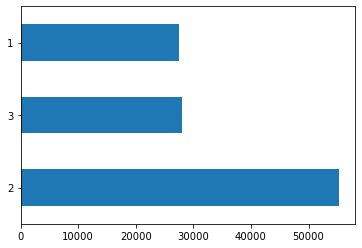

In [18]:
# explore applicant_age category
df_cr["age"].value_counts().plot(kind='barh')

### preapproval_requested

In [19]:
pd.unique(df_cr["preapproval_requested"])

array(['No Preapproval Requested', 'Preapproval Requested'], dtype=object)

In [20]:
df_cr['preapproval_requested'].mask((df_cr['preapproval_requested'] == "Preapproval Requested"), 1, inplace=True)
df_cr['preapproval_requested'].mask((df_cr['preapproval_requested'] == "No Preapproval Requested"), 0, inplace=True)

<AxesSubplot:>

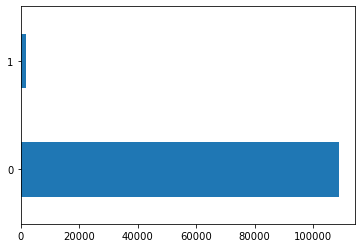

In [21]:
# explore preapproval_requested category
df_cr["preapproval_requested"].value_counts().plot(kind='barh')

### loan_type 

1. Conventional 
2. FHA-insured 
3. VA-guaranteed

In [22]:
pd.unique(df_cr['loan_type'])

array(['Converntional', 'FHA-insured', 'VA-guaranteed'], dtype=object)

In [23]:
df_cr['loan_type'].mask((df_cr['loan_type'] == "Converntional"), 1, inplace=True)
df_cr['loan_type'].mask((df_cr['loan_type'] == "FHA-insured"), 2, inplace=True)
df_cr['loan_type'].mask((df_cr['loan_type'] == "VA-guaranteed"), 3, inplace=True)

<AxesSubplot:>

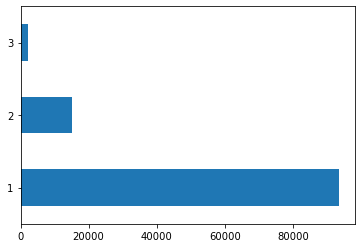

In [24]:
# explore loan_type category
df_cr["loan_type"].value_counts().plot(kind='barh')

### loan_purpose 
1. Home Purchase
2. Home Improvement 
3. Refinancing 
4. Other Purpose 

In [25]:
pd.unique(df_cr['loan_purpose'])

array(['Refinancing', 'Home Improvement', 'Home Purchase',
       'Other Purpose'], dtype=object)

In [26]:
df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == "Home Purchase"), 1, inplace=True)
df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == "Home Improvement"), 2, inplace=True)
df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == "Refinancing"), 3, inplace=True)
df_cr['loan_purpose'].mask((df_cr['loan_purpose'] == "Other Purpose"), 4, inplace=True)

<AxesSubplot:>

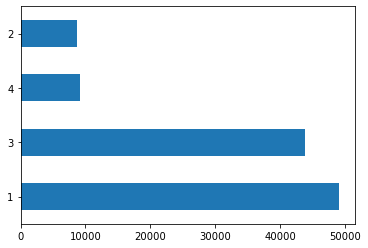

In [27]:
# explore loan_purpose category
df_cr["loan_purpose"].value_counts().plot(kind='barh')

### interest_only_payment 
1. Interest-only Payments
2. No Interest-only Payments


In [28]:
pd.unique(df_cr['interest_only_payment'])

array(['No Interest-only Payments', 'Interest-only Payments'],
      dtype=object)

In [29]:
df_cr['interest_only_payment'].mask((df_cr['interest_only_payment'] == "Interest-only Payments"), 1, inplace=True)
df_cr['interest_only_payment'].mask((df_cr['interest_only_payment'] == "No Interest-only Payments"), 2, inplace=True)

<AxesSubplot:>

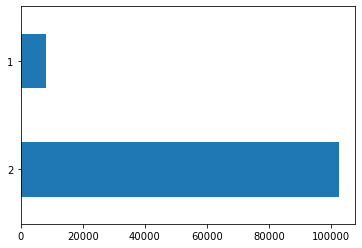

In [30]:
# explore interest_only_payment category
df_cr["interest_only_payment"].value_counts().plot(kind='barh')

### balloon_payment 
1. Balloon Payment
2. No Balloon Payment 

In [31]:
pd.unique(df_cr['balloon_payment'])

array(['No Balloon Payment', 'Balloon Payment'], dtype=object)

In [32]:
df_cr['balloon_payment'].mask((df_cr['balloon_payment'] == "Balloon Payment"), 1, inplace=True)
df_cr['balloon_payment'].mask((df_cr['balloon_payment'] == "No Balloon Payment"), 2, inplace=True)

<AxesSubplot:>

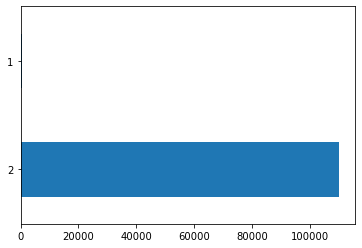

In [33]:
# explore balloon_payment category
df_cr["balloon_payment"].value_counts().plot(kind='barh')

### debt_to_income_ratio 
Description: The ratio, as a percentage, of the applicant’s or borrower’s total monthly debt to the total monthly income relied on in making the credit decision
1. <20%
2. 20%-<30%
3. 30%-<36%
4. 36%-<50%
5. 50%-60% 
6. ->60%

In [34]:
pd.unique(df_cr['debt_to_income_ratio'])

array(['30%-<36%', '36%-<50%', '20%-<30%', '>60%', '<20%', '50%-60%'],
      dtype=object)

In [35]:
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "<20%"), 1, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "20%-<30%"), 2, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "30%-<36%"), 3, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "36%-<50%"), 4, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == "50%-60%"), 5, inplace=True)
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == ">60%"), 6, inplace=True)

In [36]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

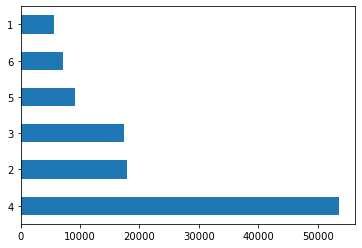

In [37]:
# explore debt_to_income_ratio category
df_cr["debt_to_income_ratio"].value_counts().plot(kind='barh')

### loan_to_value_ratio 
1. Conventional Bar - 80% or less
2. FHA Bar - 96.5% or less
3. VA Bar - 100% or less
4. Not Eligible - 100% (resource: https://www.forbes.com/advisor/mortgages/loan-to-value-ratio/)

In [38]:
pd.unique(df_cr["loan_to_value_ratio"])

array(['< Conventional Bar', '> Conventional Bar and < FHA Bar',
       '> FHA Bar and < VA Bar', 'Not Eligible'], dtype=object)

In [39]:
df_cr['loan_to_value_ratio'].mask((df_cr['loan_to_value_ratio'] == "< Conventional Bar"), 1, inplace=True)
df_cr['loan_to_value_ratio'].mask((df_cr['loan_to_value_ratio'] == "> FHA Bar and < VA Bar"), 2, inplace=True)
df_cr['loan_to_value_ratio'].mask((df_cr['loan_to_value_ratio'] == "> Conventional Bar and < FHA Bar"), 3, inplace=True)
df_cr['loan_to_value_ratio'].mask((df_cr['loan_to_value_ratio'] == "Not Eligible"), 4, inplace=True)

In [40]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

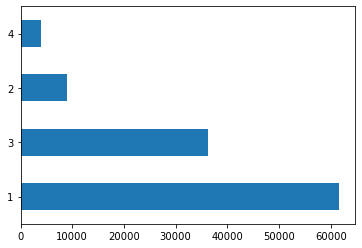

In [41]:
# explore loan_to_value_ratio category
df_cr["loan_to_value_ratio"].value_counts().plot(kind='barh')

### income 
1. Rich
2. Upper-Middle Class
3. Middle Class
4. Lower-Middle Class
5. Poor and Near Poor

In [42]:
pd.unique(df_cr["income"])

array(['Upper-Middle Class', 'Lower-Middle Class', 'Rich', 'Middle Class',
       'Poor and Near Poor'], dtype=object)

In [43]:
df_cr['income'].mask((df_cr['income'] == "Rich"), 1, inplace=True)
df_cr['income'].mask((df_cr['income'] == "Upper-Middle Class"), 2, inplace=True)
df_cr['income'].mask((df_cr['income'] == "Middle Class"), 3, inplace=True)
df_cr['income'].mask((df_cr['income'] == "Lower-Middle Class"), 4, inplace=True)
df_cr['income'].mask((df_cr['income'] == "Poor and Near Poor"), 5, inplace=True)

In [44]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

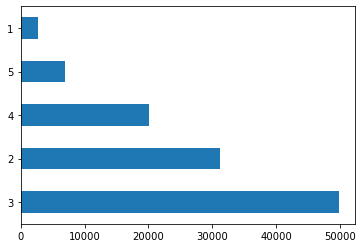

In [45]:
# explore income category
df_cr["income"].value_counts().plot(kind='barh')

In [46]:
df_cr.head()

,ethnicity,race,gender,action_taken,preapproval_requested,loan_type,loan_purpose,interest_only_payment,balloon_payment,debt_to_income_ratio,age,income,loan_to_value_ratio
0,0,1,0,1,0,1,3,2,2,3,2,2,1
1,0,1,1,0,0,1,2,2,2,4,3,4,1
2,0,1,1,1,0,1,1,2,2,3,2,1,1
3,0,1,0,1,0,1,3,2,2,2,2,2,1
4,1,1,1,1,0,1,3,2,2,4,2,3,1


In [47]:
df_cr.tail()

,ethnicity,race,gender,action_taken,preapproval_requested,loan_type,loan_purpose,interest_only_payment,balloon_payment,debt_to_income_ratio,age,income,loan_to_value_ratio
110877,0,1,1,1,0,3,3,2,2,3,3,4,3
110878,0,1,1,0,0,1,3,2,2,4,2,2,1
110879,0,2,1,1,0,1,3,2,2,4,3,2,1
110880,0,1,0,1,0,1,3,2,2,4,2,1,1
110881,0,1,1,1,0,1,3,2,2,3,2,2,3


In [48]:
df_cr.to_csv('data/Fairlearn_IL_Chicago.csv', index = False)